In [13]:
import pandas as pd
data=pd.read_excel('整合数据.xlsx',sheet_name='Sheet3')
data.fillna(0.04, inplace=True)
data

,氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3)
0,0.040000,2.34,1.18,5.73,1.86
1,0.040000,1.48,0.04,1.34,0.04
2,0.040000,3.19,0.04,1.11,0.04
3,0.040000,3.51,0.71,2.69,0.04
4,0.040000,2.93,0.59,3.57,1.33
5,0.040000,0.04,0.04,5.45,1.51
6,7.920000,0.50,0.71,1.42,0.04
7,0.040000,0.47,0.04,1.59,0.04
8,2.310000,0.63,0.04,1.90,1.55
9,0.040000,1.44,0.04,0.70,0.04


In [14]:
dataNew=data

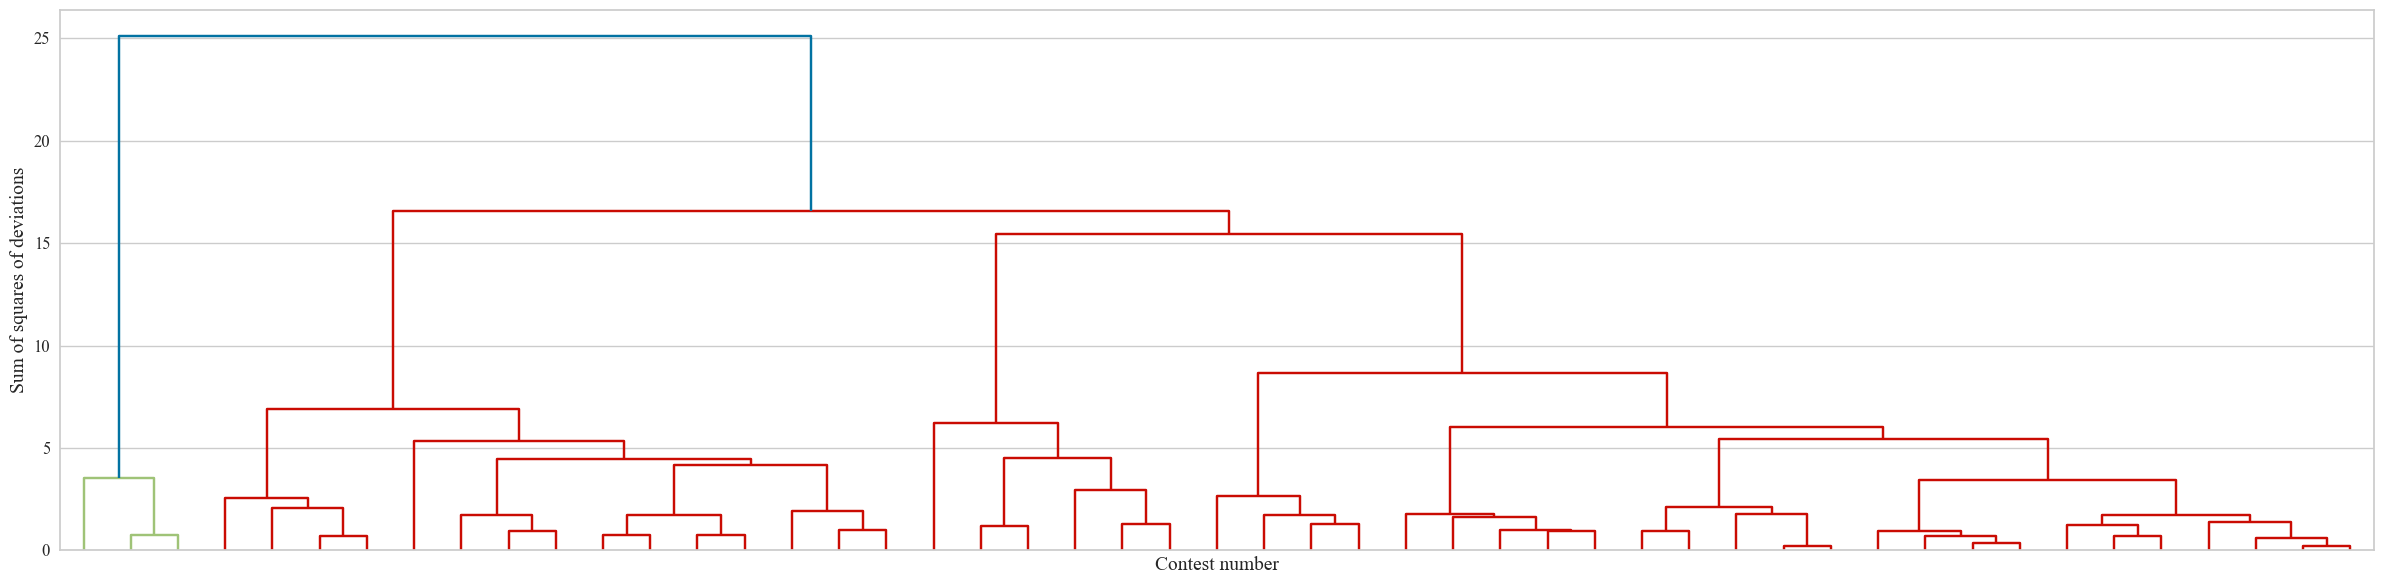

In [15]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
dendrogram = sch.dendrogram(sch.linkage(dataNew, method = 'ward'))
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('Contest number',fontsize=14)
plt.ylabel('Sum of squares of deviations',fontsize=14)
plt.xticks([],font='Times New Roman',fontsize=12)
plt.yticks(font='Times New Roman',fontsize=12)
plt.tight_layout()
plt.savefig("figures\\层次聚类树状图.pdf")

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

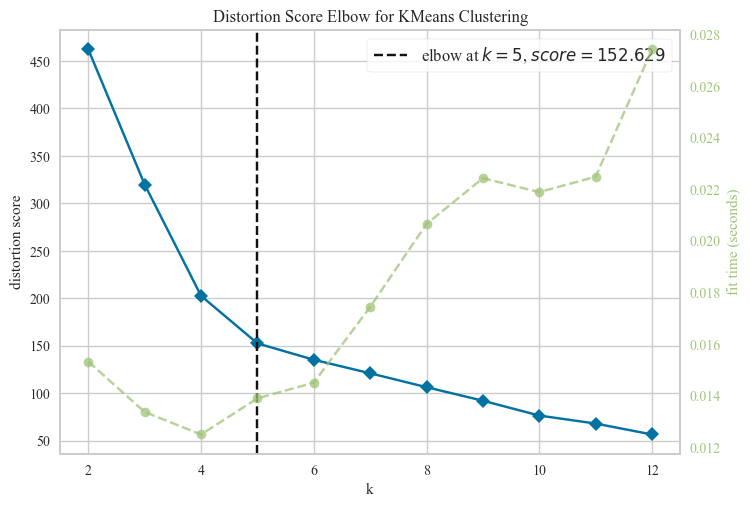

In [18]:
model = KElbowVisualizer(KMeans(random_state = 20222023), k=12)
model.fit(dataNew)
model.poof(outpath="figures\\铅钡肘部法则.pdf")

In [19]:
n_clusters = 5
cluster = KMeans(n_clusters = n_clusters, random_state = 20222023).fit(dataNew)
y_pred = cluster.labels_
data['Class']=y_pred
data

D:\python\p\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),Class
0,0.040000,2.34,1.18,5.73,1.86,4
1,0.040000,1.48,0.04,1.34,0.04,2
2,0.040000,3.19,0.04,1.11,0.04,2
3,0.040000,3.51,0.71,2.69,0.04,0
4,0.040000,2.93,0.59,3.57,1.33,0
5,0.040000,0.04,0.04,5.45,1.51,4
6,7.920000,0.50,0.71,1.42,0.04,3
7,0.040000,0.47,0.04,1.59,0.04,2
8,2.310000,0.63,0.04,1.90,1.55,2
9,0.040000,1.44,0.04,0.70,0.04,2


In [20]:
# 输出5个类别数据
def ClassDataOutPut(i):
    data[data['Class']==i].to_excel(f'Class\\铅钡Class {i}.xlsx',sheet_name='Class')


for i in range(5):
    ClassDataOutPut(i)